In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd, numpy as np
import os, sys, shutil, subprocess
import matplotlib.pyplot as plt

from modules import cpActivityScoresV2 as cpa
from modules import controlClusters as cntrlclust
from modules import  controlCorr as crr

In [2]:
TARGETMOL_LOCATION = '/Users/dterciano/Desktop/LokeyLabFiles/TargetMol'
assert os.path.isdir(TARGETMOL_LOCATION)

noPmaFileLoc = 'Datasets/TargetMol_DMSO_histdiffpy_nometa_Concatenated.csv'
pmaFileLoc = 'Datasets/TargetMol_PMA_histdiffpy_nometa_Concatenated.csv'

noPmaFile = os.path.join(TARGETMOL_LOCATION, noPmaFileLoc)
pmaFile = os.path.join(TARGETMOL_LOCATION, pmaFileLoc)
# choose one of the two annotation sheets

# keyFile = "/mnt/d/LabFiles/L4000-Bioactive Compound Library-Beverley Rabbitts (KIT10006535)_MapCleaned3_KSready.csv"
keyFile = "/Users/dterciano/Desktop/LokeyLabFiles/TargetMol/Annotations/TargetMol_KSReady_updatedTargets.csv"

assert os.path.isfile(noPmaFile) and os.path.isfile(pmaFile) and os.path.isfile(keyFile)

pma = pd.read_csv(pmaFile, sep=',', index_col=0)
pma.index.name = 'Wells'
pma.columns.name = 'Features'

noPma = pd.read_csv(noPmaFile, sep=',', index_col=0)
noPma.index.name = 'Wells'
pma.columns.name = 'Features'

key = pd.read_csv(keyFile, sep=',', index_col=1)
key = key.loc[:,'longname_proper']

plate28PMAFile = "/Users/dterciano/Desktop/LokeyLabFiles/TargetMol/Datasets/TargetMol_28PMA_rep1_PMA_blockCalc_histdiffpy.csv"
plate28NoPMAFile = "/Users/dterciano/Desktop/LokeyLabFiles/TargetMol/Datasets/TargetMol_28_rep1_DMSO_blockCalc_histdiffpy.csv"

plate28PMA = pd.read_csv(plate28PMAFile, index_col=0)
plate28NoPMA = pd.read_csv(plate28NoPMAFile, index_col=0)

display(plate28PMA, plate28NoPMA)

,Nuclei-Intensity_Nucleus_Region_HOECHST_33342_expanded_Mean,Nuclei-Intensity_Nucleus_Region_HOECHST_33342_expanded_StdDev,Nuclei-Intensity_Nucleus_Region_HOECHST_33342_expanded_Median,Nuclei-Intensity_Nucleus_Region_HOECHST_33342_expanded_Maximum,Nuclei-Intensity_Nucleus_Region_HOECHST_33342_expanded_Minimum,Nuclei-Intensity_Nucleus_Region_HOECHST_33342_expanded_Sum,Nuclei-Intensity_Nucleus_Region_HOECHST_33342_expanded_CV_[Pct],Nuclei-Intensity_Nucleus_Region_HOECHST_33342_expanded_Quantile_90Pct,Nuclei-Intensity_Nucleus_Region_HOECHST_33342_expanded_Contrast,Nuclei-Nucleus_Region_Area_[um^2],...,Nuclei-Membrane_Region_MitoTracker_Deep_Red_SER_Valley_2_px,Nuclei-Membrane_Region_MitoTracker_Deep_Red_SER_Saddle_2_px,Nuclei-Membrane_Region_MitoTracker_Deep_Red_SER_Bright_2_px,Nuclei-Membrane_Region_MitoTracker_Deep_Red_SER_Dark_2_px,Nuclei-Membrane_Region_MitoTracker_Deep_Red_Haralick_Correlation_2_px,Nuclei-Membrane_Region_MitoTracker_Deep_Red_Haralick_Contrast_2_px,Nuclei-Membrane_Region_MitoTracker_Deep_Red_Haralick_Sum_Variance_2_px,Nuclei-Membrane_Region_MitoTracker_Deep_Red_Haralick_Homogeneity_2_px,Nuclei-Membrane_Region_MitoTracker_Deep_Red_Gabor_Min_2_px_w2,Nuclei-Membrane_Region_MitoTracker_Deep_Red_Gabor_Max_2_px_w2
G01,-0.004543,-0.006402,-0.004536,-0.003216,-0.000491,-7.445176e-06,0.000039,-0.002444,-0.000606,-0.001572,...,0.004394,0.007353,-0.001651,0.004249,-0.004717,0.006795,0.000063,-0.005321,0.009328,0.006303
G02,0.000762,0.000835,0.001400,0.001203,0.000306,-2.676621e-06,-0.000164,0.000801,0.006069,-0.000776,...,0.000688,0.000536,-0.001458,0.001093,-0.000452,-0.000094,-0.000130,0.000213,-0.002074,-0.001458
J23,-0.009760,-0.009119,-0.005177,-0.008815,-0.001820,-7.445176e-06,-0.000021,-0.006916,-0.000770,-0.000139,...,0.022086,0.002292,-0.001194,0.034728,0.000810,0.026255,0.003746,-0.030423,0.036524,0.024948
J11,-0.021308,-0.035773,-0.012558,-0.022641,-0.001965,8.464571e-04,-0.019547,-0.023294,-0.044726,0.024317,...,-0.170162,-0.338437,-0.085478,-0.142608,0.335050,-0.083990,0.038101,0.194727,-0.047074,-0.094815
G20,0.000783,0.000318,0.000270,-0.000006,0.000019,-4.255816e-06,0.000052,0.000147,0.000305,-0.000126,...,-0.000932,0.000480,-0.001776,-0.000624,0.000513,-0.000112,0.000041,0.000367,-0.003030,-0.002428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
M16,0.001925,-0.000024,0.000586,0.001222,0.000739,2.845943e-07,-0.000122,0.001353,0.001293,0.000122,...,-0.000192,0.000593,0.000800,-0.000235,-0.002097,0.001106,-0.000228,-0.001019,0.001131,0.000525
E09,0.006808,0.003258,0.003543,0.009895,0.003212,-5.941848e-07,0.000591,0.011478,0.009880,-0.001311,...,0.005930,0.009004,0.001340,0.005190,-0.008161,0.015161,0.000458,-0.010914,0.002038,0.001291
N16,0.003843,0.006417,0.007216,0.010695,0.004342,8.086916e-07,0.001186,0.011375,0.006783,0.000092,...,-0.006124,-0.000614,0.001308,-0.008960,-0.003303,-0.001490,-0.005730,0.001583,-0.011748,-0.008968
L05,-0.006703,-0.004905,-0.003890,-0.009089,-0.002890,3.586249e-04,-0.009760,-0.012577,-0.019753,0.036073,...,-0.270067,-0.345587,-0.047783,-0.280780,0.238779,-0.177542,0.004302,0.224363,-0.086933,-0.121915


,Nuclei-Intensity_Nucleus_Region_HOECHST_33342_expanded_Mean,Nuclei-Intensity_Nucleus_Region_HOECHST_33342_expanded_StdDev,Nuclei-Intensity_Nucleus_Region_HOECHST_33342_expanded_Median,Nuclei-Intensity_Nucleus_Region_HOECHST_33342_expanded_Maximum,Nuclei-Intensity_Nucleus_Region_HOECHST_33342_expanded_Minimum,Nuclei-Intensity_Nucleus_Region_HOECHST_33342_expanded_Sum,Nuclei-Intensity_Nucleus_Region_HOECHST_33342_expanded_CV_[Pct],Nuclei-Intensity_Nucleus_Region_HOECHST_33342_expanded_Quantile_90Pct,Nuclei-Intensity_Nucleus_Region_HOECHST_33342_expanded_Contrast,Nuclei-Nucleus_Region_Area_[um^2],...,Nuclei-Membrane_Region_MitoTracker_Deep_Red_SER_Valley_2_px,Nuclei-Membrane_Region_MitoTracker_Deep_Red_SER_Saddle_2_px,Nuclei-Membrane_Region_MitoTracker_Deep_Red_SER_Bright_2_px,Nuclei-Membrane_Region_MitoTracker_Deep_Red_SER_Dark_2_px,Nuclei-Membrane_Region_MitoTracker_Deep_Red_Haralick_Correlation_2_px,Nuclei-Membrane_Region_MitoTracker_Deep_Red_Haralick_Contrast_2_px,Nuclei-Membrane_Region_MitoTracker_Deep_Red_Haralick_Sum_Variance_2_px,Nuclei-Membrane_Region_MitoTracker_Deep_Red_Haralick_Homogeneity_2_px,Nuclei-Membrane_Region_MitoTracker_Deep_Red_Gabor_Min_2_px_w2,Nuclei-Membrane_Region_MitoTracker_Deep_Red_Gabor_Max_2_px_w2
G01,0.000862,0.000318,0.000105,0.000081,0.000228,-0.000162,0.000873,0.000091,0.001465,-0.000219,...,0.001191,0.000609,-0.000625,0.000454,0.001646,-2.556042e-07,-0.000134,-0.001236,0.001302,0.000834
G02,0.000880,0.001060,0.001308,0.000901,0.001027,-0.000032,0.000271,0.001179,0.007581,-0.000374,...,0.000099,-0.000403,-0.000157,0.000072,0.000897,-3.611343e-05,-0.000489,0.000138,0.002623,0.002593
J23,-0.003151,-0.002168,-0.004734,-0.003168,-0.006090,-0.000078,0.000707,-0.003984,0.001817,0.001307,...,-0.000478,-0.000016,0.000225,-0.000478,0.000100,-4.809577e-06,-0.001471,-0.000219,-0.002787,-0.001043
J11,0.002452,0.000952,0.001247,0.001777,0.001853,0.000297,-0.000296,0.002163,0.003761,0.000540,...,-0.001158,-0.000145,0.000049,-0.001458,0.001184,-4.493610e-06,0.000206,-0.000098,0.001753,0.002647
G20,-0.003480,-0.001690,-0.002920,-0.002479,-0.003623,-0.000341,0.000536,-0.003731,-0.000422,-0.000031,...,-0.000257,0.000221,0.000488,-0.000554,0.002445,-1.755628e-05,-0.001045,-0.001018,0.000645,0.002014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
M16,0.001035,0.000023,-0.000043,0.000085,-0.000098,-0.000063,0.000052,0.000018,0.000573,-0.000074,...,0.000935,0.001120,0.000738,0.000873,0.000800,-1.153953e-05,0.000891,-0.001495,0.000729,0.000274
E09,0.002710,0.002597,0.005521,0.004133,0.004474,0.000025,0.000098,0.004285,0.002006,-0.000728,...,-0.001256,-0.001401,-0.000531,-0.001458,-0.000729,2.543740e-06,-0.000537,0.002133,-0.001417,-0.000554
N16,0.001258,0.001070,0.000738,0.002180,0.000734,0.000377,0.000282,0.001450,0.001730,0.000268,...,-0.000405,-0.000448,0.000226,-0.000202,0.000134,-3.073560e-05,-0.000094,0.000607,-0.003647,-0.001734
L05,0.002827,0.001857,0.006423,0.004730,0.004578,0.000737,-0.000152,0.004245,0.001729,0.000030,...,-0.006037,-0.003002,-0.000243,-0.005930,-0.004167,-5.312123e-05,-0.003353,0.003704,-0.004318,-0.005059


Remove Dead Cells

In [3]:
removeWells = ['N16._.TargetMol_08PMA_rep1', 'A20._.TargetMol_07PMA_rep1']
pmaDropped = pma[~pma.index.str.contains('|'.join(removeWells))]
pmaDropped.shape

(11518, 5880)

In [4]:
# newPma = cpa.parsePlates(inDf=pma)
# newNoPma = cpa.parsePlates(inDf=noPma)
# splicedNewPma = newPma[newPma.index.get_level_values('plates').str.contains('TargetMol_24PMA_rep1')]
# splicedNewNoPma = newNoPma[newNoPma.index.get_level_values('plates').str.contains('TargetMol_24_rep1')]


# display(cpa.getPlateActivityScores(plate='24', compoundDf=splicedNewPma, noCompDf=splicedNewNoPma, map=key))


In [5]:
keyDf = key.to_frame(name='longname_proper')

def changeName(row):
    if '_rep2' in row.name:
        return row['longname_proper'] + '_rep2'
    else:
        return row['longname_proper']

keyDf['longname_proper'] = keyDf.apply(lambda row: changeName(row), axis=1)
#display(keyDf)

res = cpa.createDataScores(compDf=pmaDropped, map=keyDf, noCompDf=noPma)
display(res)

# display(keyDf[keyDf.index.str.contains('TargetMol_01_rep2')])

#cpa.genIndivElbows(ds=res, groupByCol='plate', yCol='pma_ActivityScores', outname='test.pdf')
#cpa.genIndviPlots(ds=res, groupByCol='plate', xCol='pma_ActivityScores', yCol='noPma_ActivtyScores', outname='test2.pdf')

#cpa.analyzeDf(dataset=res, compLabel='pma_ActivityScores', outName='test.xlsx')

,pma_ActivityScores,noPma_ActivtyScores,plate,wells,well_type
Full Proper Name,,,,,
Fenoprofen calcium dihydrate._.1.0uM._.COX._.F15._.TargetMol_01,0.139674,4.318319,TargetMol_01_rep1,F15,EXPERIMENTAL
Homatropine Methylbromide._.1.0uM._.AChR._.E08._.TargetMol_01,0.154536,0.150778,TargetMol_01_rep1,E08,EXPERIMENTAL
Pranoprofen._.1.0uM._.Apoptosis._.B19._.TargetMol_01,0.080168,0.267202,TargetMol_01_rep1,B19,EXPERIMENTAL
Thioridazine hydrochloride._.1.0uM._.5-HT Receptor._.C12._.TargetMol_01,0.056571,0.759596,TargetMol_01_rep1,C12,EXPERIMENTAL
Secnidazole._.1.0uM._.Antibiotic._.G01._.TargetMol_01,0.213741,0.330722,TargetMol_01_rep1,G01,EXPERIMENTAL
...,...,...,...,...,...
CS02ACAQ_01._.1.0ug_ml._.._.E09._.TargetMol_27,0.138805,0.202353,TargetMol_27_rep1,E09,EXPERIMENTAL
HOMOORIENTIN(ISOORIENTIN)._.1.0uM._.._.N16._.TargetMol_27,0.138959,0.162166,TargetMol_27_rep1,N16,EXPERIMENTAL
DMSO._.0._.NA._.L05._.TargetMol_27,6.306776,0.203593,TargetMol_27_rep1,L05,CONTROL_DMSO


In [6]:
res = cntrlclust.formatDf(compDf=noPma, key=keyDf, controls=['DMSO', 'PMA'], noCompDf=pma)
display(res)
# display(res[res.index.get_level_values('longname_proper').str.contains('PMA') & res.index.get_level_values('plates').str.contains('rep2')])

,Nuclei-Intensity_Nucleus_Region_HOECHST_33342_expanded_Mean,Nuclei-Intensity_Nucleus_Region_HOECHST_33342_expanded_StdDev,Nuclei-Intensity_Nucleus_Region_HOECHST_33342_expanded_Median,Nuclei-Intensity_Nucleus_Region_HOECHST_33342_expanded_Maximum,Nuclei-Intensity_Nucleus_Region_HOECHST_33342_expanded_Minimum,Nuclei-Intensity_Nucleus_Region_HOECHST_33342_expanded_Sum,Nuclei-Intensity_Nucleus_Region_HOECHST_33342_expanded_CV_[Pct],Nuclei-Intensity_Nucleus_Region_HOECHST_33342_expanded_Quantile_90Pct,Nuclei-Intensity_Nucleus_Region_HOECHST_33342_expanded_Contrast,Nuclei-Nucleus_Region_Area_[um^2],...,Nuclei-Membrane_Region_MitoTracker_Deep_Red_SER_Valley_2_px,Nuclei-Membrane_Region_MitoTracker_Deep_Red_SER_Saddle_2_px,Nuclei-Membrane_Region_MitoTracker_Deep_Red_SER_Bright_2_px,Nuclei-Membrane_Region_MitoTracker_Deep_Red_SER_Dark_2_px,Nuclei-Membrane_Region_MitoTracker_Deep_Red_Haralick_Correlation_2_px,Nuclei-Membrane_Region_MitoTracker_Deep_Red_Haralick_Contrast_2_px,Nuclei-Membrane_Region_MitoTracker_Deep_Red_Haralick_Sum_Variance_2_px,Nuclei-Membrane_Region_MitoTracker_Deep_Red_Haralick_Homogeneity_2_px,Nuclei-Membrane_Region_MitoTracker_Deep_Red_Gabor_Min_2_px_w2,Nuclei-Membrane_Region_MitoTracker_Deep_Red_Gabor_Max_2_px_w2
longname_proper,,,,,,,,,,,,,,,,,,,,,
DMSO._.0._.NA._.A01._.TargetMol_01,0.000012,-5.526233e-06,0.000012,-6.045673e-06,0.000039,0.000000,0.021561,-7.499777e-06,0.024419,-0.003240,...,0.001455,-0.000087,-0.000972,0.000908,-0.000339,-1.428537e-06,-0.000004,-0.001515,0.000559,0.001682
DMSO._.0._.NA._.A04._.TargetMol_01,0.000123,1.058412e-05,0.000102,1.734191e-05,0.000106,0.000000,0.006587,7.173575e-05,0.013054,-0.001305,...,0.000834,0.000178,-0.000205,0.000331,0.000465,2.962845e-06,0.000016,-0.000472,0.000644,0.002049
DMSO._.0._.NA._.A19._.TargetMol_01,0.000002,1.586813e-06,0.000018,-8.778378e-08,0.000020,0.000000,0.003594,-1.609958e-08,0.003541,-0.000987,...,0.000054,-0.000532,-0.001032,0.000252,-0.000427,-2.750038e-07,-0.000003,0.000773,-0.000431,-0.000823
DMSO._.0._.NA._.C07._.TargetMol_01,-0.000002,-1.067867e-07,-0.000008,-3.200623e-07,-0.000010,0.000000,0.001061,-5.304448e-07,0.001780,0.000367,...,-0.000163,-0.000045,-0.000042,-0.000189,0.000312,3.823968e-06,0.000005,0.000499,-0.000585,-0.001320
DMSO._.0._.NA._.C14._.TargetMol_01,-0.000006,-1.569688e-06,-0.000014,-3.771665e-06,-0.000007,0.000000,0.002050,-6.659144e-06,0.002460,0.000029,...,-0.000213,-0.000024,-0.000046,-0.000110,0.000416,1.910999e-05,0.000004,-0.000120,-0.001171,-0.002510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PMA._.0._.NA._.M12._.TargetMol_27PMA,0.001076,-2.248048e-03,-0.000832,-2.201849e-04,-0.000068,-0.000414,-0.000491,-1.471456e-03,-0.000900,-0.001077,...,0.008081,0.006276,-0.000135,0.007838,-0.001795,9.775914e-03,0.005783,-0.010716,0.007024,0.006062
PMA._.0._.NA._.O18._.TargetMol_27PMA,0.001825,-1.609618e-05,0.000352,9.071983e-04,0.001669,0.000790,-0.000131,1.997663e-05,0.001030,-0.000257,...,-0.001260,0.000785,0.001690,-0.002510,-0.002206,1.176161e-03,-0.004048,-0.000516,0.004203,0.002226
PMA._.0._.NA._.P08._.TargetMol_27PMA,-0.005129,-1.362663e-02,-0.017751,-2.701568e-02,-0.019947,-0.002875,-0.004816,-1.491638e-02,-0.024916,-0.000032,...,0.000222,0.000316,0.000309,0.000229,-0.000130,3.815665e-04,-0.000023,-0.001195,0.006532,0.002888


In [7]:
#cntrlclust.genTreeViewClustMap(inDf=res, outname = 'testOut/test', rowCluster=False)

/Users/dterciano/Desktop/GitRepos/QCGauntlet/modules/controlCorr.py:118: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=45,size=12,ha='right', rotation_mode='anchor')


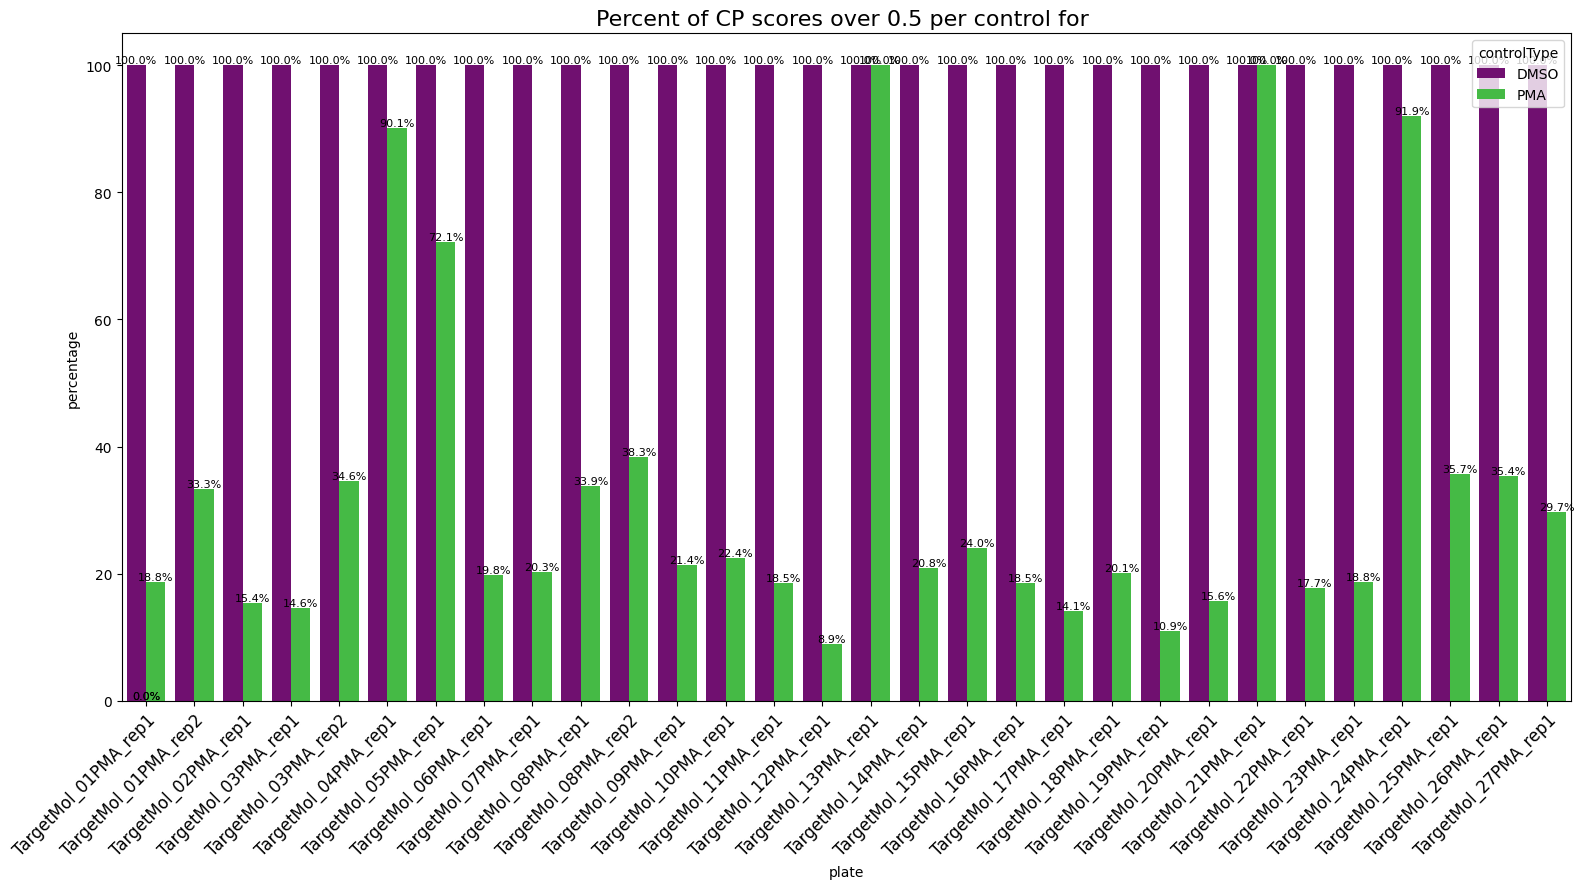

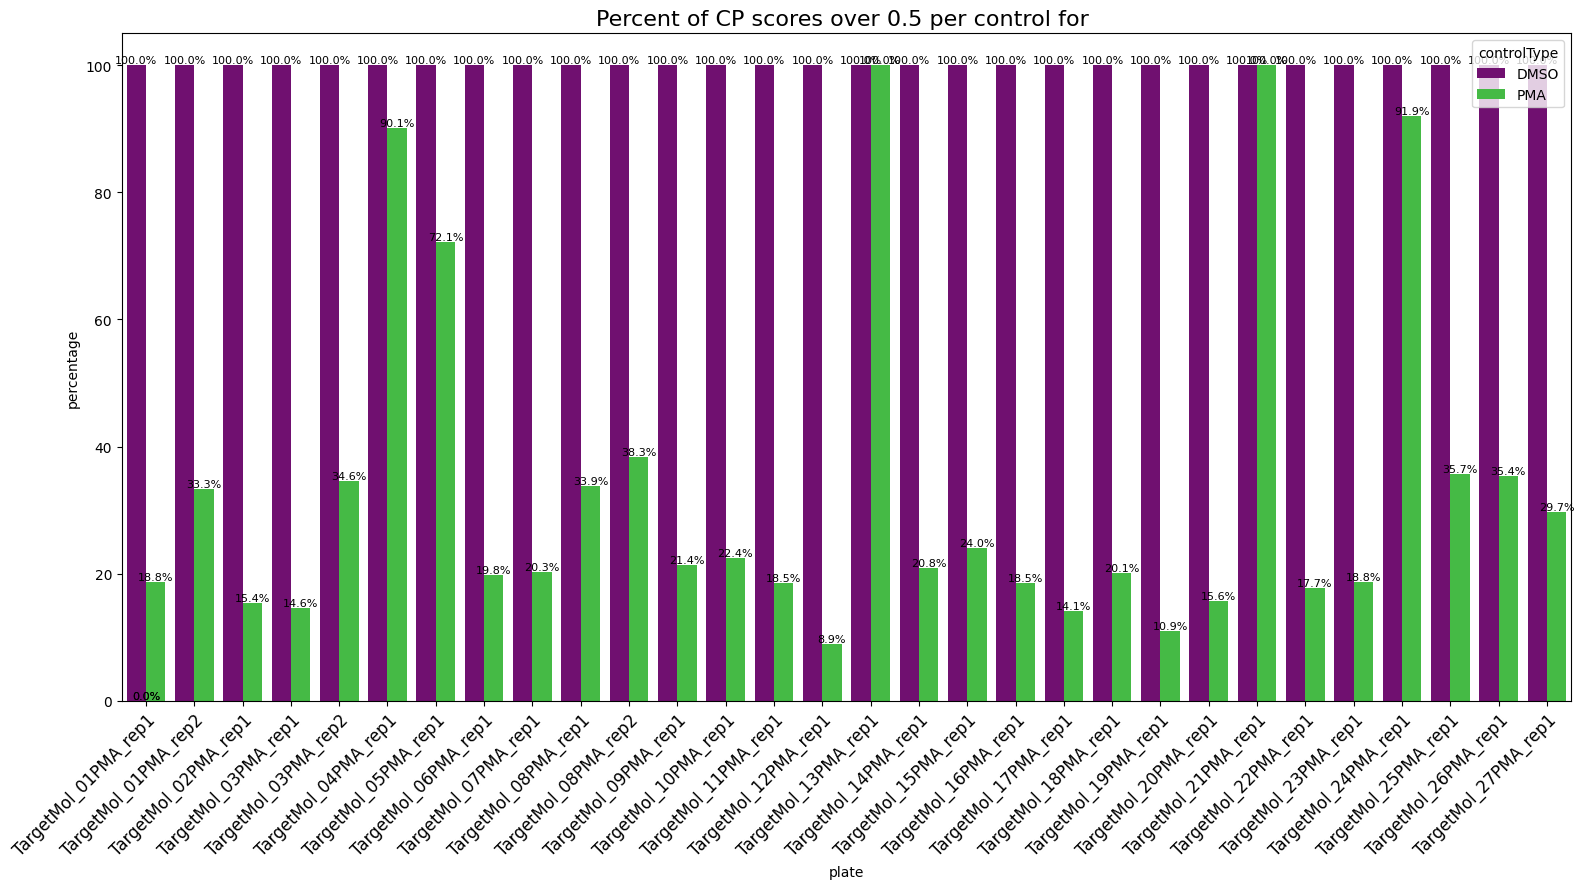

In [8]:
noPma
crr.generateControlsAboveThresh(inDF=pma, datasetLab='', key=keyDf, controlList=['DMSO', 'PMA'])

# lets try out our Cpactivityscores v2

In [9]:
TARGETMOL_LOCATION = '/Users/dterciano/Desktop/LokeyLabFiles/TargetMol'
assert os.path.isdir(TARGETMOL_LOCATION)

noPmaFileLoc = 'Datasets/TargetMol_DMSO_histdiffpy_nometa_Concatenated.csv'
pmaFileLoc = 'Datasets/TargetMol_PMA_histdiffpy_nometa_Concatenated.csv'

noPmaFile = os.path.join(TARGETMOL_LOCATION, noPmaFileLoc)
pmaFile = os.path.join(TARGETMOL_LOCATION, pmaFileLoc)
# choose one of the two annotation sheets

# keyFile = "/mnt/d/LabFiles/L4000-Bioactive Compound Library-Beverley Rabbitts (KIT10006535)_MapCleaned3_KSready.csv"
keyFile = "/Users/dterciano/Desktop/LokeyLabFiles/TargetMol/Annotations/TargetMol_KSReady_updatedTargets.csv"

assert os.path.isfile(noPmaFile) and os.path.isfile(pmaFile) and os.path.isfile(keyFile)

rep2PlatesLoc = 'Datasets/TargetMol_rep2_DMSO+PMA_blockRecalc_longconcat_histdiffpy.csv'
rep2PlatesFile = os.path.join(TARGETMOL_LOCATION, rep2PlatesLoc)

plate8rep2NoPMALoc = 'Datasets/TargetMol_08_rep2_DMSO_blockRecalc_histdiffpy.csv'
plate8rep2PMALoc = 'Datasets/TargetMol_08PMA_rep2_PMA_blockRecalc_histdiffpy.csv'
plate8rep2PMAFile = os.path.join(TARGETMOL_LOCATION, plate8rep2PMALoc)
plate8rep2NoPMAFile = os.path.join(TARGETMOL_LOCATION, plate8rep2NoPMALoc)

assert os.path.isfile(rep2PlatesFile)

pma = pd.read_csv(pmaFile, sep=',', index_col=0)
pma.index.name = 'Wells'
pma.columns.name = 'Features'

noPma = pd.read_csv(noPmaFile, sep=',', index_col=0)
noPma.index.name = 'Wells'
pma.columns.name = 'Features'

key = pd.read_csv(keyFile, sep=',', index_col=1)
key = key.loc[:,'longname_proper']

rep2Plates = pd.read_csv(rep2PlatesFile, sep=',', index_col=0)

plate8rep2PMA = pd.read_csv(plate8rep2PMAFile, sep=',', index_col=0)
plate8rep2NoPMA = pd.read_csv(plate8rep2NoPMAFile, sep=',', index_col=0)

rep2PlatesPMA = rep2Plates[(rep2Plates.index.str.contains('PMA_')) & (~rep2Plates.index.str.contains("TargetMol_01PMA_rep2._.TargetMol_01PMA_rep2_PMA"))]
rep2PlatesNoPMA = rep2Plates[(~rep2Plates.index.str.contains('PMA_'))]

rep2PlatesPMA = pd.concat([rep2PlatesPMA, plate8rep2PMA], axis = 0)
rep2PlatesNoPMA = pd.concat([rep2PlatesNoPMA, plate8rep2NoPMA], axis = 0)

rep2PlatesPMA.index.name = 'well'
rep2PlatesNoPMA.index.name = 'well'
display(rep2PlatesPMA)

,Nuclei-Intensity_Nucleus_Region_HOECHST_33342_expanded_Mean,Nuclei-Intensity_Nucleus_Region_HOECHST_33342_expanded_StdDev,Nuclei-Intensity_Nucleus_Region_HOECHST_33342_expanded_Median,Nuclei-Intensity_Nucleus_Region_HOECHST_33342_expanded_Maximum,Nuclei-Intensity_Nucleus_Region_HOECHST_33342_expanded_Minimum,Nuclei-Intensity_Nucleus_Region_HOECHST_33342_expanded_Sum,Nuclei-Intensity_Nucleus_Region_HOECHST_33342_expanded_CV_[Pct],Nuclei-Intensity_Nucleus_Region_HOECHST_33342_expanded_Quantile_90Pct,Nuclei-Intensity_Nucleus_Region_HOECHST_33342_expanded_Contrast,Nuclei-Nucleus_Region_Area_[um^2],...,Nuclei-Membrane_Region_MitoTracker_Deep_Red_SER_Valley_2_px,Nuclei-Membrane_Region_MitoTracker_Deep_Red_SER_Saddle_2_px,Nuclei-Membrane_Region_MitoTracker_Deep_Red_SER_Bright_2_px,Nuclei-Membrane_Region_MitoTracker_Deep_Red_SER_Dark_2_px,Nuclei-Membrane_Region_MitoTracker_Deep_Red_Haralick_Correlation_2_px,Nuclei-Membrane_Region_MitoTracker_Deep_Red_Haralick_Contrast_2_px,Nuclei-Membrane_Region_MitoTracker_Deep_Red_Haralick_Sum_Variance_2_px,Nuclei-Membrane_Region_MitoTracker_Deep_Red_Haralick_Homogeneity_2_px,Nuclei-Membrane_Region_MitoTracker_Deep_Red_Gabor_Min_2_px_w2,Nuclei-Membrane_Region_MitoTracker_Deep_Red_Gabor_Max_2_px_w2
well,,,,,,,,,,,,,,,,,,,,,
G01._.TargetMol_01PMA_rep2,0.013286,0.005506,0.015727,0.014731,0.011512,0.002417,-0.003913,0.012776,0.037855,-0.000636,...,0.018376,-0.001210,-0.009457,0.021329,0.000863,0.001793,0.004236,-0.011880,0.032416,0.013720
G02._.TargetMol_01PMA_rep2,0.001245,0.003788,0.001225,0.002216,0.001140,-0.000115,0.008999,0.002163,0.002719,-0.001173,...,0.000594,0.004010,0.004285,0.000473,-0.002824,0.000030,-0.000030,-0.003495,-0.000348,0.000663
J23._.TargetMol_01PMA_rep2,-0.025407,-0.024572,-0.038837,-0.035199,-0.037401,-0.014593,0.003035,-0.035049,-0.006319,-0.000838,...,0.001317,0.003304,0.004222,0.000364,-0.008559,0.001479,-0.000180,-0.001176,0.014918,0.011424
J11._.TargetMol_01PMA_rep2,-0.002472,-0.011878,-0.004709,-0.003604,-0.002302,0.009513,-0.026215,-0.004847,-0.046784,0.017163,...,-0.211779,-0.271474,-0.061789,-0.191788,0.231920,-0.023100,0.007883,0.203281,-0.048323,-0.110891
G20._.TargetMol_01PMA_rep2,0.003441,0.001315,0.003039,0.002193,0.002260,0.001472,-0.000602,0.002395,0.013302,0.000103,...,0.001383,0.004061,0.002828,0.000733,-0.003459,0.000819,0.000016,-0.003815,0.001297,-0.002621
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
M16._.TargetMol_08PMA_rep2,0.002476,0.001009,0.002683,0.001299,0.001857,0.000284,-0.000608,0.001684,0.000244,-0.000008,...,-0.000525,-0.001598,-0.000281,-0.000904,0.001117,-0.001018,0.000157,0.001078,-0.003718,-0.002107
E09._.TargetMol_08PMA_rep2,0.000327,0.000024,0.000535,0.000075,0.000066,0.000059,-0.000321,0.000096,0.000924,0.000346,...,-0.001416,-0.000346,0.003140,-0.002313,-0.001871,0.000276,-0.000573,-0.000339,-0.002895,-0.003396
N16._.TargetMol_08PMA_rep2,-0.000061,-0.000151,-0.000341,-0.000204,-0.000361,0.000046,-0.003895,-0.000228,-0.000949,0.001889,...,-0.010041,-0.007300,-0.001129,-0.008967,0.003987,-0.011039,-0.001607,0.005196,-0.014233,-0.014990


In [10]:
display(rep2PlatesNoPMA)

,Nuclei-Intensity_Nucleus_Region_HOECHST_33342_expanded_Mean,Nuclei-Intensity_Nucleus_Region_HOECHST_33342_expanded_StdDev,Nuclei-Intensity_Nucleus_Region_HOECHST_33342_expanded_Median,Nuclei-Intensity_Nucleus_Region_HOECHST_33342_expanded_Maximum,Nuclei-Intensity_Nucleus_Region_HOECHST_33342_expanded_Minimum,Nuclei-Intensity_Nucleus_Region_HOECHST_33342_expanded_Sum,Nuclei-Intensity_Nucleus_Region_HOECHST_33342_expanded_CV_[Pct],Nuclei-Intensity_Nucleus_Region_HOECHST_33342_expanded_Quantile_90Pct,Nuclei-Intensity_Nucleus_Region_HOECHST_33342_expanded_Contrast,Nuclei-Nucleus_Region_Area_[um^2],...,Nuclei-Membrane_Region_MitoTracker_Deep_Red_SER_Valley_2_px,Nuclei-Membrane_Region_MitoTracker_Deep_Red_SER_Saddle_2_px,Nuclei-Membrane_Region_MitoTracker_Deep_Red_SER_Bright_2_px,Nuclei-Membrane_Region_MitoTracker_Deep_Red_SER_Dark_2_px,Nuclei-Membrane_Region_MitoTracker_Deep_Red_Haralick_Correlation_2_px,Nuclei-Membrane_Region_MitoTracker_Deep_Red_Haralick_Contrast_2_px,Nuclei-Membrane_Region_MitoTracker_Deep_Red_Haralick_Sum_Variance_2_px,Nuclei-Membrane_Region_MitoTracker_Deep_Red_Haralick_Homogeneity_2_px,Nuclei-Membrane_Region_MitoTracker_Deep_Red_Gabor_Min_2_px_w2,Nuclei-Membrane_Region_MitoTracker_Deep_Red_Gabor_Max_2_px_w2
well,,,,,,,,,,,,,,,,,,,,,
G01._.TargetMol_01_rep2,-0.000911,-0.000051,-0.000739,-0.000523,-0.000172,-0.000168,0.001081,-0.000470,-0.001377,-0.000197,...,0.000332,-0.000530,-0.001945,0.000121,-0.000365,-1.610624e-06,-0.000209,0.001361,-0.005320,-0.004878
G02._.TargetMol_01_rep2,-0.000558,-0.001947,-0.001791,-0.001862,-0.000981,-0.000233,-0.001149,-0.001619,-0.000690,0.000006,...,-0.000081,0.000191,-0.000139,-0.000203,-0.000153,8.698414e-06,-0.000048,0.000966,0.002897,0.000800
J23._.TargetMol_01_rep2,0.010570,0.012601,0.013146,0.012449,0.009938,0.002668,0.001218,0.015817,0.044692,-0.000182,...,0.001853,0.000564,0.003054,0.003048,-0.001658,-8.955034e-07,0.000908,-0.000321,0.013450,0.008717
J11._.TargetMol_01_rep2,-0.000246,-0.001059,-0.000534,-0.000384,-0.000731,-0.000038,-0.001364,-0.000512,-0.000898,0.000271,...,-0.000848,-0.000917,-0.000420,-0.000845,0.000323,-7.659390e-06,-0.000100,0.000420,-0.009034,-0.009561
G20._.TargetMol_01_rep2,0.008345,0.008583,0.011564,0.011091,0.009796,0.003920,0.000806,0.011291,0.022507,0.000283,...,0.000299,0.000127,-0.000609,0.000268,-0.000025,3.486652e-05,0.000040,-0.000477,0.007199,0.004206
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
M16._.TargetMol_08_rep2,-0.001709,-0.002685,-0.000899,-0.002191,-0.001297,-0.000785,-0.000897,-0.001425,-0.001436,-0.000329,...,0.002028,0.001949,0.000236,0.001465,0.001268,-3.185517e-06,0.001315,-0.000584,0.002408,0.000648
E09._.TargetMol_08_rep2,0.000987,-0.000027,0.000815,0.000989,-0.000031,0.000206,-0.000136,0.001488,0.001541,0.000197,...,-0.000202,-0.000284,0.000211,-0.000103,0.000461,1.269134e-05,0.001492,-0.000611,-0.001240,-0.000423
N16._.TargetMol_08_rep2,-0.001752,-0.000631,-0.000615,-0.000604,-0.000399,-0.001698,-0.000159,-0.000347,-0.001278,-0.004097,...,-0.009786,-0.004939,0.002899,-0.009316,-0.000638,-3.236522e-05,0.000189,0.002011,-0.013063,-0.011620


,pma_ActivityScores,noPma_ActivtyScores,plate,wells,well_type
Full Proper Name,,,,,
Secnidazole._.1.0uM._.Antibiotic._.G01._.TargetMol_01_rep2,1.571122,0.103912,TargetMol_01_rep2,G01,EXPERIMENTAL
Diclofenac._.1.0uM._.Apoptosis._.G02._.TargetMol_01_rep2,0.355294,0.207100,TargetMol_01_rep2,G02,EXPERIMENTAL
Betaxolol hydrochloride._.1.0uM._.Adrenergic Receptor._.J23._.TargetMol_01_rep2,0.372051,0.840352,TargetMol_01_rep2,J23,EXPERIMENTAL
DMSO._.0._.NA._.J11._.TargetMol_01_rep2,5.666785,0.181149,TargetMol_01_rep2,J11,CONTROL_DMSO
Doxapram hydrochloride monohydrate._.1.0uM._.Potassium Channel._.G20._.TargetMol_01_rep2,0.331272,0.382813,TargetMol_01_rep2,G20,EXPERIMENTAL
...,...,...,...,...,...
E6446 dihydrochloride._.1.0uM._.TLR._.M16._.TargetMol_08_rep2,0.088836,0.229282,TargetMol_08_rep2,M16,EXPERIMENTAL
FTIDC._.1.0uM._.GluR._.E09._.TargetMol_08_rep2,0.095083,0.066444,TargetMol_08_rep2,E09,EXPERIMENTAL
Wortmannin._.1.0uM._.Antibiotic._.N16._.TargetMol_08_rep2,0.248696,0.224915,TargetMol_08_rep2,N16,EXPERIMENTAL


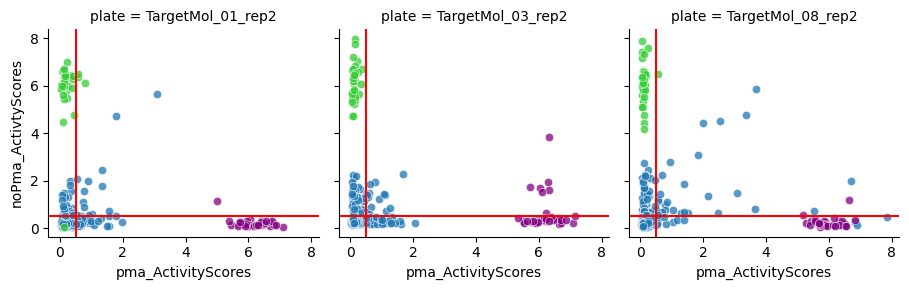

In [18]:
ds = cpa.createDataScores(compDf=rep2PlatesPMA, noCompDf=rep2PlatesNoPMA, wellLabels = 'well', map=keyDf)
display(ds)
g = cpa.createMultiPlot(ds=ds, x='pma_ActivityScores', y = 'noPma_ActivtyScores', groupByCol='plate', hue='well_type')
g.savefig('repsMulti.pdf', format='pdf', dpi=320)

cpa.genIndviPlots(ds=ds, groupByCol='plate', xCol='pma_ActivityScores', yCol='noPma_ActivtyScores', outname='repsIndv.pdf')
cpa.analyzeDf(dataset=ds, compLabel='pma_ActivityScores', noCompLabel='noPma_ActivtyScores', outName='repScores.xlsx')